In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [28]:
all_df = pd.read_csv("spotify-2023.csv", encoding="latin-1")
all_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# data pre processing code ripped off from michael, thanks michael

In [29]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [30]:
all_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [31]:
key_dropped = all_df.dropna(subset=['key'])
key_dropped.isnull().sum()

clean_df = key_dropped.copy()
clean_df['in_shazam_charts'] = pd.DataFrame(key_dropped['in_shazam_charts'].fillna(0))
clean_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [32]:
artist_df = clean_df["artist(s)_name"].str.split(',', expand=True)
artist_df

clean_df["artist_1"] = artist_df[0]
clean_df["artist_2"] = artist_df[1]
clean_df["artist_3"] = artist_df[2]

clean_df = clean_df.drop("artist(s)_name", axis=1)

clean_df.insert(1, 'artist_1', clean_df.pop('artist_1'))
clean_df.insert(2, 'artist_2', clean_df.pop('artist_2'))
clean_df.insert(3, 'artist_3', clean_df.pop('artist_3'))
clean_df

cleaner_df = clean_df.copy()
cleaner_df['artist_2'] = pd.DataFrame(clean_df['artist_2'].fillna("empty"))

even_cleaner_df = cleaner_df.copy()
even_cleaner_df['artist_3'] = pd.DataFrame(cleaner_df['artist_3'].fillna("empty")) 
even_cleaner_df.isnull().sum()

track_name              0
artist_1                0
artist_2                0
artist_3                0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [33]:
dropped_df = even_cleaner_df.drop(['released_year', 'released_month', 'released_day', 'track_name', 'in_spotify_playlists',
                   'in_apple_playlists', 'in_deezer_playlists'
                  ], axis = 1)

dropped_df['streams'] = pd.to_numeric(dropped_df['streams'], errors='coerce')

dropped_df.isna().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               1
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [34]:
all_df.iloc[574]

df = dropped_df.dropna(subset=['streams'])
df.isnull().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               0
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [35]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df.isnull().sum()

df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0)) 
df.isnull().sum()

/var/folders/s8/qpt_80y1163gfxh_f0pjl5hr0000gn/T/ipykernel_57960/2966075576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
/var/folders/s8/qpt_80y1163gfxh_f0pjl5hr0000gn/T/ipykernel_57960/2966075576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
/var/folders/s8/qpt_80y1163gfxh_f0pjl5hr0000gn/T/ipykernel_57960/2966075576.py:5: SettingWithCopyWarning: 


artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               0
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [36]:
df = df.reset_index(drop=True)
df

,artist_1,artist_2,artist_3,artist_count,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Latto,Jung Kook,empty,2,147,141381703.0,263,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,Myke Towers,empty,empty,1,48,133716286.0,126,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,Olivia Rodrigo,empty,empty,1,113,140003974.0,207,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Taylor Swift,empty,empty,1,100,800840817.0,207,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,Bad Bunny,empty,empty,1,50,303236322.0,133,15,425.0,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Selena Gomez,empty,empty,1,0,91473363.0,13,1,0.0,144,A,Major,60,24,39,57,0,8,3
853,Taylor Swift,empty,empty,1,0,121871870.0,0,0,0.0,166,F#,Major,42,7,24,83,1,12,6
854,Feid,Paulo Londra,empty,2,0,73513683.0,0,0,0.0,92,C#,Major,80,81,67,4,0,8,6
855,Feid,Sech,Jhayco,3,0,133895612.0,26,0,0.0,97,C#,Major,82,67,77,8,0,12,5


In [37]:
df['spotify_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_spotify_charts']))
df['deezer_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_deezer_charts']))
df['apple_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_apple_charts']))
df['shazam_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_shazam_charts']))
df

,artist_1,artist_2,artist_3,artist_count,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,spotify_top_100,deezer_top_100,apple_top_100,shazam_top_100
0,Latto,Jung Kook,empty,2,147,141381703.0,263,10,826.0,125,...,89,83,31,0,8,4,0,1,0,0
1,Myke Towers,empty,empty,1,48,133716286.0,126,14,382.0,92,...,61,74,7,0,10,4,1,1,0,0
2,Olivia Rodrigo,empty,empty,1,113,140003974.0,207,14,949.0,138,...,32,53,17,0,31,6,0,1,0,0
3,Taylor Swift,empty,empty,1,100,800840817.0,207,12,548.0,170,...,58,72,11,0,11,15,1,1,0,0
4,Bad Bunny,empty,empty,1,50,303236322.0,133,15,425.0,144,...,23,80,14,63,11,6,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Selena Gomez,empty,empty,1,0,91473363.0,13,1,0.0,144,...,24,39,57,0,8,3,0,1,1,0
853,Taylor Swift,empty,empty,1,0,121871870.0,0,0,0.0,166,...,7,24,83,1,12,6,0,0,0,0
854,Feid,Paulo Londra,empty,2,0,73513683.0,0,0,0.0,92,...,81,67,4,0,8,6,0,0,0,0
855,Feid,Sech,Jhayco,3,0,133895612.0,26,0,0.0,97,...,67,77,8,0,12,5,0,0,1,0


In [38]:
df = df.drop(['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'], axis=1)

In [39]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['artist_1', 'artist_2', 'artist_3', 'key', 'mode']

In [40]:
ohe = encoder.fit_transform(df[['artist_1', 'artist_2', 'artist_3', 'key', 'mode']])
encoded_df = pd.DataFrame(ohe, columns = encoder.get_feature_names_out(['artist_1', 'artist_2', 'artist_3', 'key', 'mode']))

encoded_df

,artist_1_(G)I-DLE,artist_1_21 Savage,artist_1_24kgoldn,artist_1_50 Cent,artist_1_A$AP Rocky,artist_1_Abhijay Sharma,artist_1_Adele,artist_1_Aerosmith,artist_1_Agust D,artist_1_Aitana,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
combined_df = pd.concat([df, encoded_df], axis=1)

combined_df.isnull().values.any()

False

In [42]:
combined_df = combined_df.drop(['artist_1', 'artist_2', 'artist_3', 'key', 'mode'], axis='columns')

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(combined_df), columns = list(combined_df))
scaled_df

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.142857,0.038170,0.425532,0.780822,0.913978,0.831325,0.319588,0.000000,0.053191,0.032258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.036101,0.191489,0.657534,0.612903,0.722892,0.072165,0.000000,0.074468,0.032258,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.037798,0.517730,0.383562,0.301075,0.469880,0.175258,0.000000,0.297872,0.064516,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.216215,0.744681,0.438356,0.580645,0.698795,0.113402,0.000000,0.085106,0.209677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.081869,0.560284,0.575342,0.204301,0.795181,0.144330,0.692308,0.085106,0.064516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.000000,0.024696,0.560284,0.506849,0.215054,0.301205,0.587629,0.000000,0.053191,0.016129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.000000,0.032903,0.716312,0.260274,0.032258,0.120482,0.855670,0.010989,0.095745,0.064516,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.142857,0.019847,0.191489,0.780822,0.827957,0.638554,0.041237,0.000000,0.053191,0.064516,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.285714,0.036149,0.226950,0.808219,0.677419,0.759036,0.082474,0.000000,0.095745,0.048387,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# logistic regression model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
spotify_df = combined_df.drop(['apple_top_100', 'shazam_top_100', 'deezer_top_100'], axis=1)
spotify_df = spotify_df.drop(['streams'], axis=1)

In [46]:
x = spotify_df.drop(['spotify_top_100'], axis=1)
y = pd.DataFrame(spotify_df['spotify_top_100'])

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)
y_train = y_train.values.ravel()

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
y_pred = model.predict(X_test_scaled)

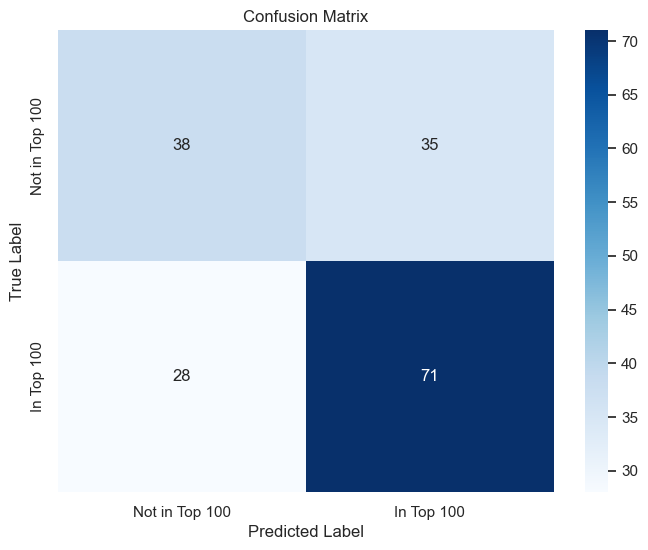

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not in Top 100', 'In Top 100'], yticklabels=['Not in Top 100', 'In Top 100'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

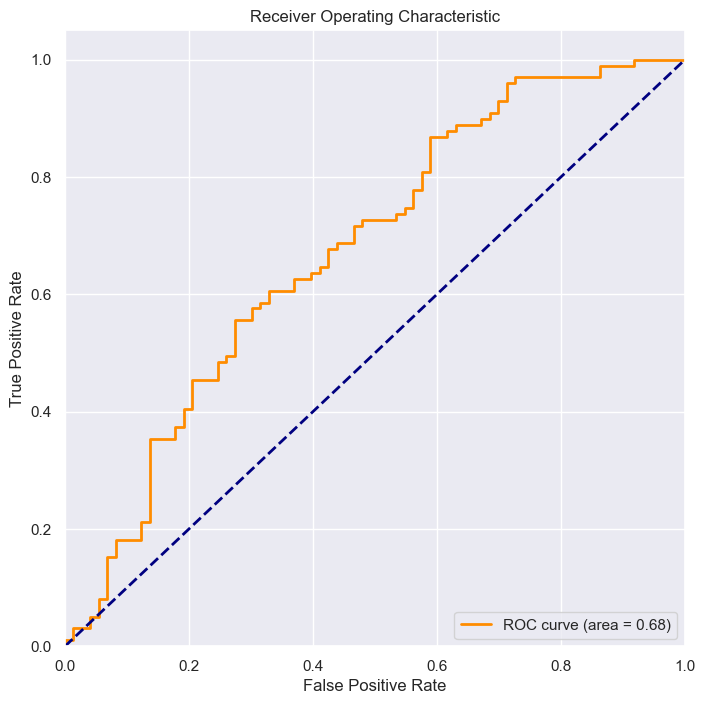

In [51]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [60]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

accuracy_manual = accuracy_score(y_test, y_pred)
print(f"Accuracy with accuracy_score: {accuracy_manual:.2f}")

Accuracy with accuracy_score: 0.63


# LG for Apple Music

In [61]:
apple_df = combined_df.drop(['shazam_top_100', 'spotify_top_100', 'deezer_top_100'], axis = 1)
y_apple = pd.DataFrame(apple_df['apple_top_100'])
y_apple = y_apple.rename(columns={'apple_top_100' : 'spotify_top_100'})
x_apple = apple_df.drop(['apple_top_100', 'streams'], axis=1) 

/Users/chaewonkim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


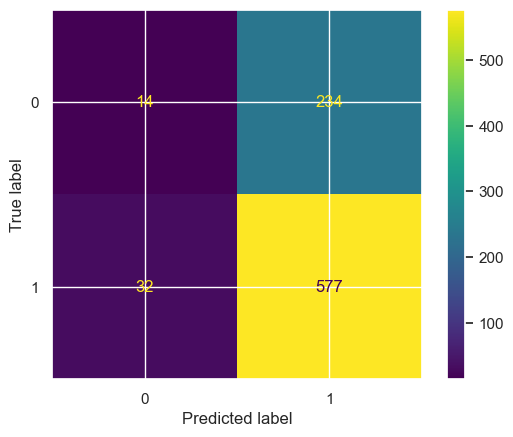

In [62]:
y_apple_pred_model = model.predict(x_apple)

cm_model_apple = confusion_matrix(y_apple, y_apple_pred_model)

ConfusionMatrixDisplay(confusion_matrix=cm_model_apple).plot();

In [63]:
accuracy_apple_model = accuracy_score(y_apple, y_apple_pred_model)
f1_apple_model = f1_score(y_apple, y_apple_pred_model)

print("Accuracy:", accuracy_apple_model)
print("F1 Score:", f1_apple_model)

Accuracy: 0.6896149358226371
F1 Score: 0.8126760563380281


# LG for Shazam

In [64]:
shazam_df = combined_df.drop(['apple_top_100', 'spotify_top_100', 'deezer_top_100'], axis = 1)
y_shazam = pd.DataFrame(shazam_df['shazam_top_100'])
y_shazam = y_shazam.rename(columns={'shazam_top_100' : 'spotify_top_100'})
x_shazam = shazam_df.drop(['shazam_top_100', 'streams'], axis=1)

/Users/chaewonkim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


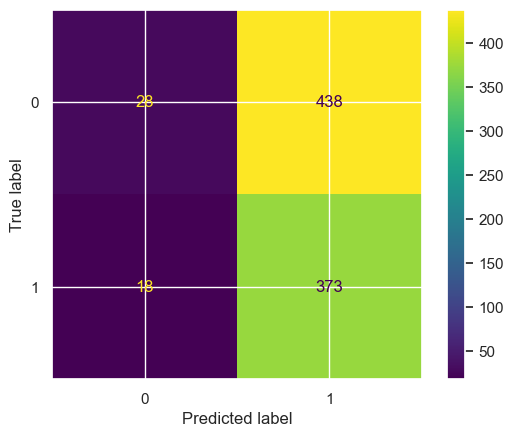

In [65]:
y_shazam_pred_model = model.predict(x_shazam)

cm_model_shazam = confusion_matrix(y_shazam, y_shazam_pred_model)

ConfusionMatrixDisplay(confusion_matrix=cm_model_shazam).plot();

In [66]:
accuracy_shazam_model = accuracy_score(y_shazam, y_shazam_pred_model)
f1_shazam_model = f1_score(y_shazam, y_shazam_pred_model)

print("Accuracy:", accuracy_shazam_model)
print("F1 Score:", f1_shazam_model)

Accuracy: 0.4679113185530922
F1 Score: 0.6206322795341098


# LG for Deezer

In [67]:
deezer_df = combined_df.drop(['apple_top_100', 'spotify_top_100', 'shazam_top_100'], axis = 1)
y_deezer = pd.DataFrame(deezer_df['deezer_top_100'])
y_deezer = y_deezer.rename(columns={'deezer_top_100' : 'spotify_top_100'})
x_deezer = deezer_df.drop(['deezer_top_100', 'streams'], axis=1) 

/Users/chaewonkim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


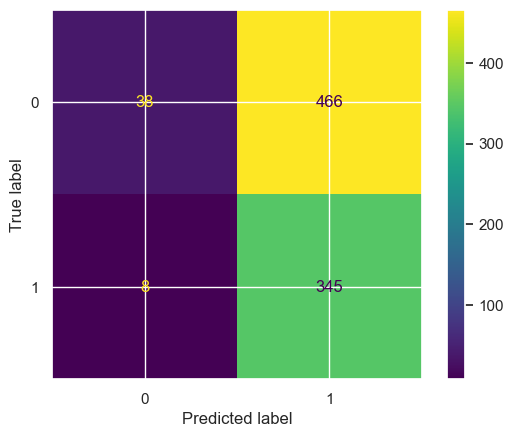

In [68]:
y_deezer_pred_model = model.predict(x_deezer)

cm_model_deezer = confusion_matrix(y_deezer, y_deezer_pred_model)

ConfusionMatrixDisplay(confusion_matrix=cm_model_deezer).plot();

In [69]:
accuracy_deezer_model = accuracy_score(y_deezer, y_deezer_pred_model)
f1_deezer_model = f1_score(y_deezer, y_deezer_pred_model)

print("Accuracy:", accuracy_deezer_model)
print("F1 Score:", f1_deezer_model)

Accuracy: 0.4469078179696616
F1 Score: 0.5927835051546392
